## ZhangLabData

ZhangLabData zawiera 2 foldery z zdjęciami x-ray. W folderze NORMAL sa osoby zdrowe, a w PNEUMONIA osoby chore.

In [62]:
import numpy as np 
import pandas as pd 
import pydicom,os,cv2
from glob import glob
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt
print(os.listdir("C:/Users/maaja/Desktop/AndrzejczukMaja/ZhangLabData/CellData/chest_xray/train"))

['.DS_Store', 'NORMAL', 'PNEUMONIA']


In [63]:
Normal = sorted(glob('C:/Users/maaja/Desktop/AndrzejczukMaja/ZhangLabData/CellData/chest_xray/train/NORMAL/*.jpeg'))
Pneumonia = sorted(glob('C:/Users/maaja/Desktop/AndrzejczukMaja/ZhangLabData/CellData/chest_xray/train/PNEUMONIA/*.jpeg'))

#### Jaka jest liczba zdjęć w folderze NORMAL, a jaka w folderze PNEUMONIA?

In [64]:
print(f'Liczba zdjęć w folderze NORMAL jest równa {len(Normal)}')
print(f'Liczba zdjęć w folderze PNEUMONIA jest równa {len(Pneumonia)}')

Liczba zdjęć w folderze NORMAL jest równa 1349
Liczba zdjęć w folderze PNEUMONIA jest równa 830


#### Czy w naszej folderach wszystkie zdjęcia są unikalne?

In [65]:

a_set = set(Normal)
number_of_unique_values = len(a_set)

b_set = set(Pneumonia)
number2 = len(b_set)



print(f' W ramce jest {number_of_unique_values} unikalnych zdjęć w folderze Normal oraz {number2} unikalnych zdjęć w folderze Pneumonia.')
print(f' Oznacza to, że w naszych folderach wszystkie nazwy zdjęć są unikatowe, nie mamy dupliktów')

 W ramce jest 1349 unikalnych zdjęć w folderze Normal oraz 830 unikalnych zdjęć w folderze Pneumonia.
 Oznacza to, że w naszych folderach wszystkie nazwy zdjęć są unikatowe, nie mamy dupliktów


In [66]:
img_id=[]
for k in range(830):
    img_id.append(Pneumonia[k].split('\\')[-1])

#### W folderze PNEUMONIA są zdjęcia dotyczące wirusów oraz dotyczące bakterii. Ile jest zdjęć dotyczących wirusów, a ile bakterii?

In [67]:
a = sum(w.startswith('BACTERIA') for w in img_id)
b = sum(w.startswith('VIRUS') for w in img_id)
print(f'Liczba zdjęć w folderze PNEUMONIA dotycząca bakterii jest równa {a}')
print(f'Liczba zdjęć w folderze PNEUMONIA dotycząca wirusów jest równa {b}')

Liczba zdjęć w folderze PNEUMONIA dotycząca bakterii jest równa 545
Liczba zdjęć w folderze PNEUMONIA dotycząca wirusów jest równa 285


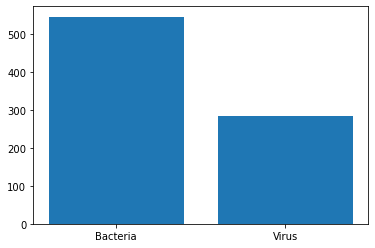

In [68]:
a = sum(w.startswith('BACTERIA') for w in img_id)
b = sum(w.startswith('VIRUS') for w in img_id)
c = ("Bacteria", "Virus")
d = (a,b)

plt.bar(c, d)
plt.show()

#### Jakie są rozmiary zdjęć? Sprawdzam dla przykladowych 10 zdjęć czy rozmiary zdjęć są różne

In [69]:
for i in range(10):
    im = Image.open(Normal[i])
    im
    width, height = im.size
    print(f'Zdjęcie nr {i}: szerokość {width}, wysokość {height}')

Zdjęcie nr 0: szerokość 2572, wysokość 2476
Zdjęcie nr 1: szerokość 1982, wysokość 1751
Zdjęcie nr 2: szerokość 1236, wysokość 1013
Zdjęcie nr 3: szerokość 1414, wysokość 1206
Zdjęcie nr 4: szerokość 1786, wysokość 1449
Zdjęcie nr 5: szerokość 1646, wysokość 1395
Zdjęcie nr 6: szerokość 1550, wysokość 1075
Zdjęcie nr 7: szerokość 1684, wysokość 1240
Zdjęcie nr 8: szerokość 1534, wysokość 1187
Zdjęcie nr 9: szerokość 1632, wysokość 1225


Jak widać rozmiary zdjęć są różnorodne

#### Jak wyglądają nasze zdjęcia?

In [70]:
import cv2 as cv

zdj = cv2.imread(Normal[1])


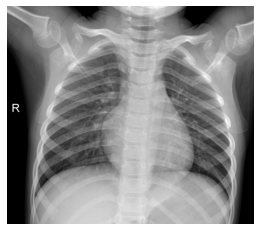

In [71]:
plt.imshow(zdj, cmap="gray")
plt.axis("off")
plt.show()

#### Biore jedno zdjęcie z folderu. Jakie są informacje na temat pixeli zdjęcia, z którym pracuje?

In [72]:
xray_image = zdj
print("The data type of the X-ray image is: ", xray_image.dtype)
print("The minimum pixel value is: ", np.min(xray_image))
print("The maximum pixel value is: ", np.max(xray_image))
print("The average pixel value is: ", np.mean(xray_image))
print("The median pixel value is: ", np.median(xray_image))

The data type of the X-ray image is:  uint8
The minimum pixel value is:  0
The maximum pixel value is:  255
The average pixel value is:  128.9182897361231
The median pixel value is:  143.0


Typ danych tablicy to uint8, a wyniki wartości minimalnej/maksymalnej sugerują, że wszystkie 256 kolorów (od 0 do 255) jest używanych w promieniowaniu rentgenowskim. Zwizualizujmy rozkład intensywności pikseli oryginalnego surowego obrazu rentgenowskiego za pomocą ndimage.histogram() i Matplotlib:

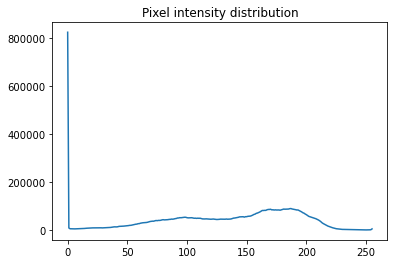

In [73]:
pixel_intensity_distribution = ndimage.histogram(
    xray_image, min=np.min(xray_image), max=np.max(xray_image), bins=256
)

plt.plot(pixel_intensity_distribution)
plt.title("Pixel intensity distribution")
plt.show()

#### Jak stworzyć na naszych danych maske warunkową?

Mogę tworzyć różne maski warunkowe za pomocą funkcji np.where() w NumPy — na przykład miejmy tylko te wartości obrazu, których piksele przekraczają pewien próg.

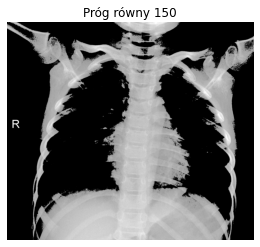

In [74]:
xray_image_mask_noisy = np.where(xray_image > 150, xray_image, 0)

plt.imshow(xray_image_mask_noisy, cmap="gray")
plt.title("Próg równy 150")
plt.axis("off")
plt.show()

## WNIOSKI

Wiemy, że folder NORMAL posiada o 1.5 raza więcej danych niż zbiór PNEUMONIA. W zbiorze PNEUMONIA występują zdjęcia dotyczące Bacterii jak i Virusów. Zdjęcia dotyczące bakterii stanowią 2/3 zbioru PNEUMONIA. Zbadaliśmy, że zdjęcia się różnią rozmiarem. 
Zauważyliśmy rónież, że znaczną część zdjęcia stanowią piksele o wartości 0.